<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [12]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [13]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [14]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [15]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [16]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

<class 'urllib.error.URLError'>: <urlopen error [Errno 23] Host is unreachable>

In [21]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


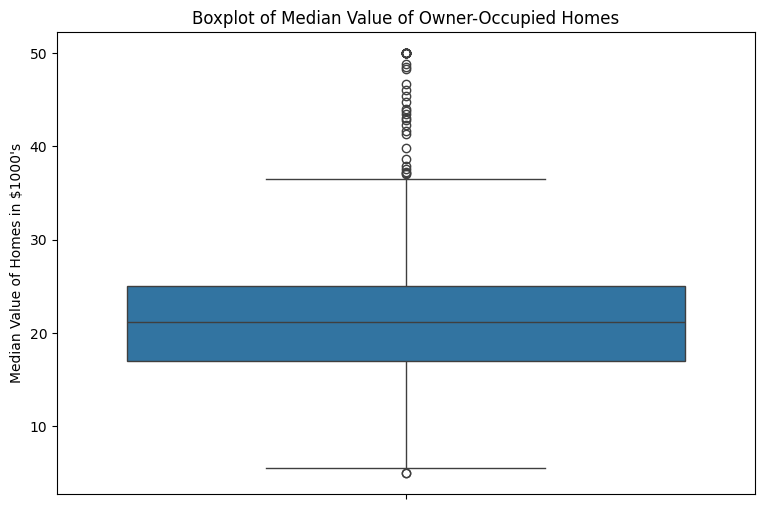

In [25]:
# "Median value of owner-occupied homes" boxplot
plt.figure(figsize=(9, 6))
sns.boxplot(y=boston_df.MEDV)
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('Median Value of Homes in $1000\'s')
plt.show()

We see that the median of the value of owner-occupied homes is about 21 and there exist many outliers in the boxplot.

<ipython-input-28-87678f5500f4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=boston_df.CHAS,bins=9, kde=False)


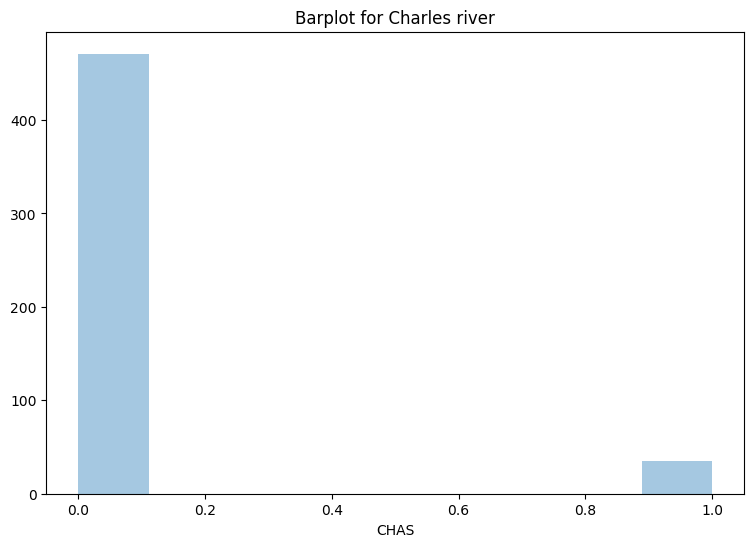

In [28]:
# Barplot for the Charles River 
plt.figure(figsize=(9,6))
sns.distplot(a=boston_df.CHAS,bins=9, kde=False)
plt.title("Barplot for Charles river")
plt.show()

We see that a lot of the houses do not bound the Charles River.

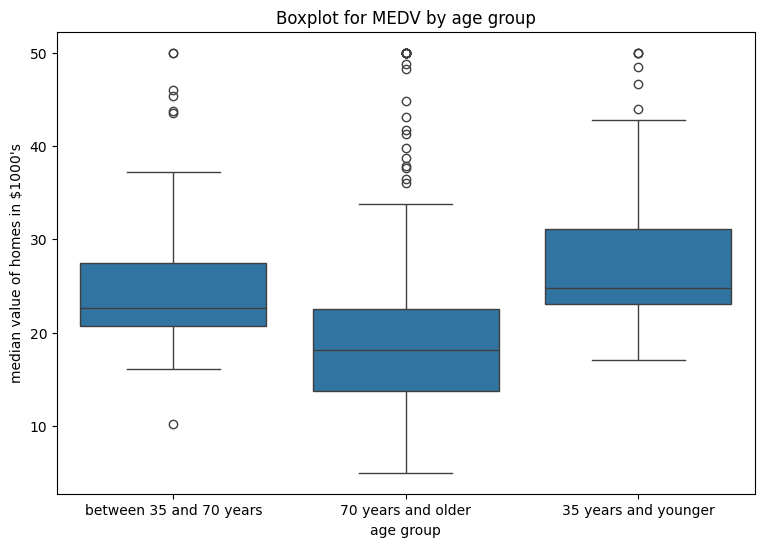

In [29]:
# Boxplot for the MEDV variable vs the AGE variable
def cat_age(age):
    if age <= 35:
        return '35 years and younger'
    elif 35 <= age <= 70:
        return 'between 35 and 70 years'
    else:
        return '70 years and older'
boston_df['AGE_GROUP'] = boston_df['AGE'].apply(cat_age)

plt.figure(figsize=(9,6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Boxplot for MEDV by age group')
plt.xlabel('age group')
plt.ylabel('median value of homes in $1000\'s')
plt.show()
          

All groups contain outliers. If a person is younger, the median will be lower as well.

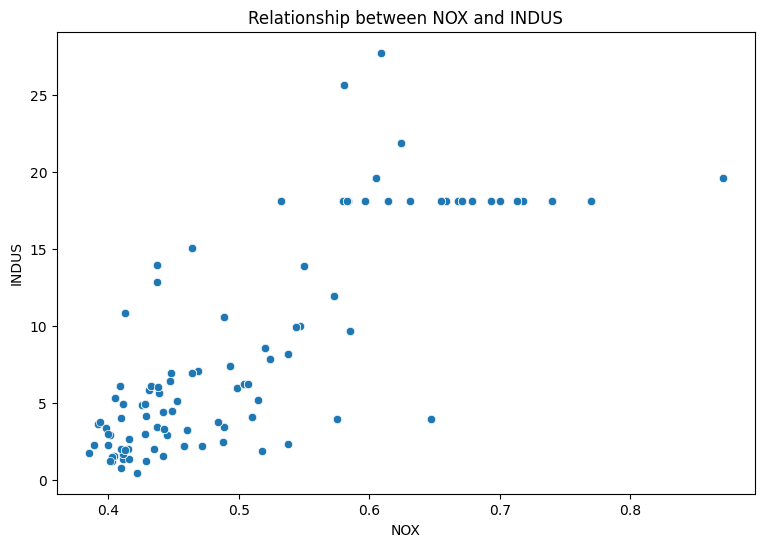

In [30]:
# Scatter plot to show the relationships between Nitric oxide concentrations and the proportion of non-retail business acres per town.
plt.figure(figsize=(9,6))
sns.scatterplot(x=boston_df.NOX, y=boston_df.INDUS, data=boston_df)
plt.title("Relationship between NOX and INDUS")
plt.show()

It seems like there exist a linear relationship. However, at NOX at 0.6, it stops.

<ipython-input-32-2d1dd686bbcd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=boston_df.PTRATIO, bins=9, kde=False)


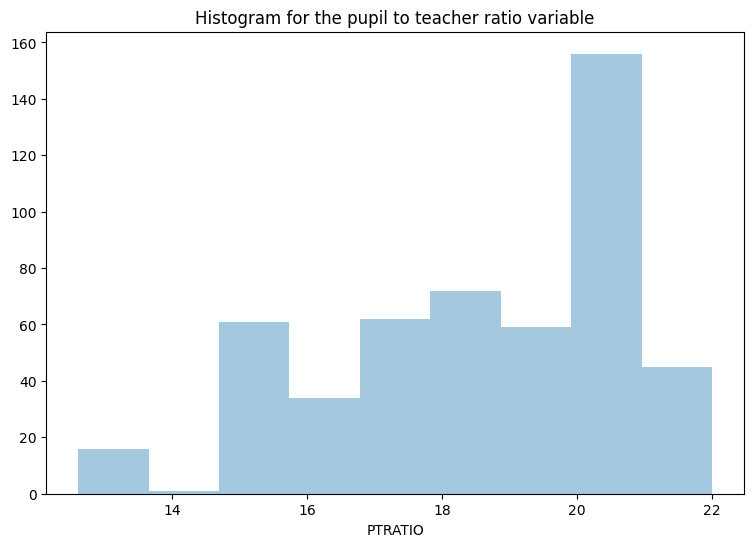

In [32]:
# Histogram for the pupil to teacher ratio variable
plt.figure(figsize=(9,6))
sns.distplot(a=boston_df.PTRATIO, bins=9, kde=False)
plt.title("Histogram for the pupil to teacher ratio variable")
plt.show()

We observed that the lowest is at PTRATIO at 14 and the highest is at 21.

In [34]:
# Hypothesis testing
gp_1 = boston_df[boston_df['CHAS'] == 1] ['MEDV']
gp_0 = boston_df[boston_df['CHAS'] == 0] ['MEDV']
t_stat, p_value = scipy.stats.ttest_ind(gp_1, gp_0, equal_var=False)
print(f"T-stat: {t_stat}")
print(f"P-vvalue: {p_value}")

T-stat: 3.113291312794837
P-vvalue: 0.003567170098137517


Null hypothesis: Median values have no significant difference between houses bounded by Charles River.

Alternative hypothesis: Median values have significant difference between houses bounded by Charles River.

Conclusion: since our p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference in the median value of houses.

In [35]:
# Hypothesis testing
gp = [boston_df[boston_df['AGE_GROUP'] == group]['MEDV'] for group in boston_df['AGE_GROUP'].unique()]
f_stat, p_value = scipy.stats.f_oneway(*gp)
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15


Null hypothesis: There is no difference in the median values of houses for each proportion of owner occupied units built prior to 1940.

Alternative hypothesis: There is a difference in the median values of houses for each proportion of owner occupied units built prior 1940.

Conclusion: Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference in the median values of houses across the different age groups.

In [36]:
# Pearson correlation
correlation_coefficient, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98


Null hypothesis: There is no relationship between nitric oxide concentrations and propotion of non-retail business acres per town.

Alternative hypothesis: There is a relationship between nitric oxide concentrations and proportion of non-retail business acres per town.

Conclusion: Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant (positive) linear relationship between the nitric oxide concentrations and the non-retail business acres per town.

In [37]:
# Regression analysis
y=boston_df['MEDV']
x=boston_df['DIS']
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        18:31:23   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

Null hypothesis: 

We can see the association of an additional unit of weighted distance to the five Boston employment center. To be more specific, an additional unit of weighted distance to the five Boston employment centers is associated with an increase of approximately 1091,6 dollars in the median vvalue of owner-occupied homes. We can say that the effect is statistically significant.
